# Exploring MNIST Manifolds
** November 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

Pg 158 of the [Deep Learning Book](http://www.deeplearningbook.org/), "In the case of images, we can certainly think of many possible transformations that allow us to trace out a manifold in image space: we can gradually dim or brighten the lights, gradually move or rotate objects in the image, gradually alter the colors on the surfaces of objects, and so forth. Multiple manifolds are likely involved in most applications." 

In this notebook we will explore manifolds in the MNIST dataset by modeling the transformations which represent their traversal. Are some transformations over representend? I.e. do we have a manifold bias? How would we quantify this? We do this by assigning each image to a manifold and studying the distribution. We wish to explore that here. 

** Note: ** This notebook contains interactive elements and certain latex snippets that will not render in github markdown. 
You must run this notebook on your local Jupyter notebook environment for interactive elements or render or if you wish to render just the latex by using the url of this repo with the online NBViewer. 

## Libraries

In [252]:
# Visualization 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Interactive Components
from ipywidgets import interact

# Dataset Operations and Linear Algebra 
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data

## Gathering data from files into a dictionary numpy arrays. 

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

unique, counts    = np.unique(mnist.train.labels, return_counts=True)
sortedCount       = sorted(dict(zip(unique, counts)).items(), key=lambda x: x[1],reverse=True)
sortedCountLabels = [i[0] for i in sortedCount]
sortedCountFreq   = [i[1] for i in sortedCount]

# TODO: Make more efficient.
# First we will zip the training labels with the training images
dataWithLabels = zip(mnist.train.labels, mnist.train.images)

# Now let's turn this into a dictionary where subsets of the images in respect
# to digit class are stored via the corresponding key.

# Init dataDict with keys [0,9] and empty lists.
digitDict = {}
for i in range(0,10):
    digitDict[i] = []

# Assign a list of image vectors to each corresponding digit class index.
for i in dataWithLabels:
    digitDict[i[0]].append(i[1])

# Convert the lists into numpy matricies. (could be done above, but I claim ignorace)
for i in range(0,10):
    digitDict[i] = np.matrix(digitDict[i])
    print("Digit {0} matrix shape: {1}".format(i,digitDict[i].shape))


#nImgs = digitDict[9].shape[0]
#avgImg = np.dot(digitDict[9].T, np.ones((nImgs,1)))/nImgs

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Digit 0 matrix shape: (5444, 784)
Digit 1 matrix shape: (6179, 784)
Digit 2 matrix shape: (5470, 784)
Digit 3 matrix shape: (5638, 784)
Digit 4 matrix shape: (5307, 784)
Digit 5 matrix shape: (4987, 784)
Digit 6 matrix shape: (5417, 784)
Digit 7 matrix shape: (5715, 784)
Digit 8 matrix shape: (5389, 784)
Digit 9 matrix shape: (5454, 784)


## Experiment 1: PCA

With principle components analysis, we can explore sources of variability in the MNIST dataset. The aim is to use this notion of variablity to describe the transformations found in the data. Once we can model the transformations found in the data, we can use them to describe various manifolds in MNIST. 

Let's begin by using this interactive section to explore the first two principle components as vectors plotted over each digit with respect to each digit class. 

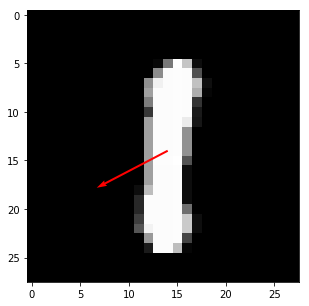

In [271]:
def pcaVectOnIMG(dataset,elmIndex):
    X_r = PCA(n_components=2).fit(dataset)
    pcaVect = X_r.transform(dataset[elmIndex])
    origin = [[14], [14]]
    plt.figure(figsize=(5,5))
    plt.imshow(dataset[elmIndex].reshape(28,28),cmap='gray')
    plt.quiver(*origin, pcaVect[:,0], pcaVect[:,1], color=['r','b','g'], scale=10)
    plt.show()
    
z =  lambda elmIndex=0,digit=1 :pcaVectOnIMG(digitDict[digit],elmIndex)

# Will error for some values of elmIndex.
interact( z, elmIndex=[0,8000],digit=[0,9])

I hope you noticed how the first two principle components as a vector did a good job showing the left or right lean bias of the 1's; however, when a 1 is stretched or shrunk in the virtical direction, variablility not captured by the first two principle components essentially add noise and reduce the signifigance of where the vector is pointing. Here's an example where the vector does a great job at showing the variablity. 

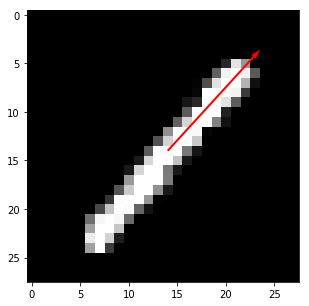

In [272]:
pcaVectOnIMG(digitDict[1],1340)

Here's an example where our principle component vector does not do a good job at showing the variability. 

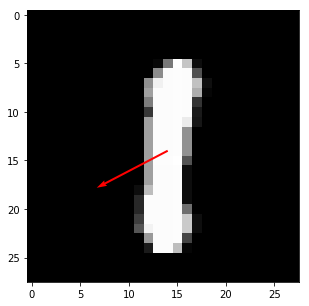

In [274]:
pcaVectOnIMG(digitDict[1],2313)

### Experiment 1.1: Plotting the space of PCA Vectors

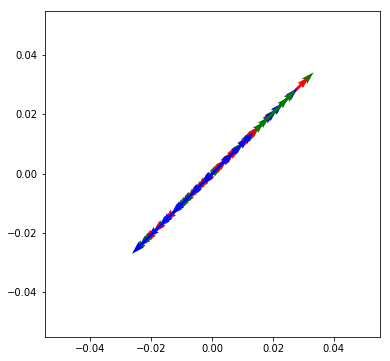

In [291]:
def plotPCAVectors(data,componentIndexVec=[0,1],nComponents=100,filterDensity=50):
    data = data[0::filterDensity]
    X_r = PCA(n_components=nComponents).fit(data).transform(data)

    plt.figure(figsize=(6,6))
    ax = plt.gca()

    origin = [0], [0] # origin point
    
    plt.quiver(*origin, X_r[:,componentIndexVec[0]], X_r[:,componentIndexVec[1]], color=['r','b','g'], scale=13)

    plt.show()
    
z = lambda fIndex=0,sIndex=1,digit=1:plotPCAVectors(digitDict[digit],[fIndex,sIndex])
    
print("fIndex: the first principle component in the vector")
print("sIndex: the first principle component in the vector")
interact(z,fIndex=[0,100],sIndex=[0,100],digit=[0,9])

In [246]:
def plotPCAVectors(data,filterDensity=1):
    data = data[0::filterDensity]
    X_r = PCA(n_components=2).fit(data).transform(data)

    plt.figure(figsize=(10,10))
    ax = plt.gca()

    origin = [0], [0] # origin point
    
    plt.quiver(*origin, X_r[:,0], X_r[:,1], color=['r','b','g'], scale=21)

    plt.show()

#plotPCAVectors(digitDict[5],50)

def pcaVectOnIMG(dataset,elmIndex):
    X_r = PCA(n_components=2).fit(dataset)
    pcaVect = X_r.transform(dataset[elmIndex])
    origin = [[14], [14]]
    plt.imshow(dataset[elmIndex].reshape(28,28),cmap='gray')
    plt.quiver(*origin, pcaVect[:,0], pcaVect[:,1], color=['r','b','g'], scale=10)
    plt.show()

#pcaVectOnIMG(digitDict[1],190)

def pcaR2Vects(dataset):
    return PCA(n_components=2).fit(dataset).transform(dataset)

#pcaR2Vects(digitDict[1])

def dataWithPCA_R2Vects(dataset):
    pcaVects = pcaR2Vects(dataset)
    print(dataset.shape)
    print(pcaVects.shape)
    return zip(dataset,pcaVects)

def R2Norm(vects):
    return np.linalg.norm( pcaR2Vects(ds), 2 , axis= 1)

ds = digitDict[1]
vectMag = zip(list(range(0,2,1)),R2Norm( pcaR2Vects(ds) ))



[0, 1]

## Experiment 2: MNIST Statistics
In this section we will do things like explore the co-variance matrix of the digits. 

## Experiment 3: K-Means Manifold Clustering
Here we will work within digit classes. 

In [197]:
def KMeanDict(data,nClusters):
    kmLabels = KMeans(n_clusters=nClusters, random_state=None).fit(data).labels_
    classDict = {label: data[label==kmLabels] for label in np.unique(kmLabels)}    

    for i in classDict:
        classDict[i] = np.matrix(classDict[i])
        
    return classDict

KMeanDict(digitDict[9],2)

{0: matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 1: matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)}

In [51]:
print("Shape of images matrix:  {0}".format(nImgs.shape))
print("Shape of K-Means Labels: {0}".format(kmLabels.shape))

Shape of images matrix:  (5454, 784)
Shape of K-Means Labels: (5454,)


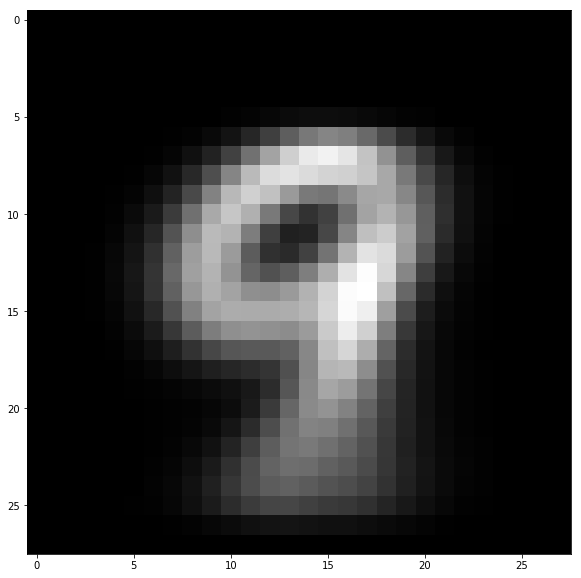

In [52]:
n = nImgs.shape[0]
avgImg = np.dot(nImgs.T, np.ones((n,1)))/n

plt.figure(figsize=(10,10))
plt.imshow(avgImg.reshape(28,28),cmap='gray')
plt.show()

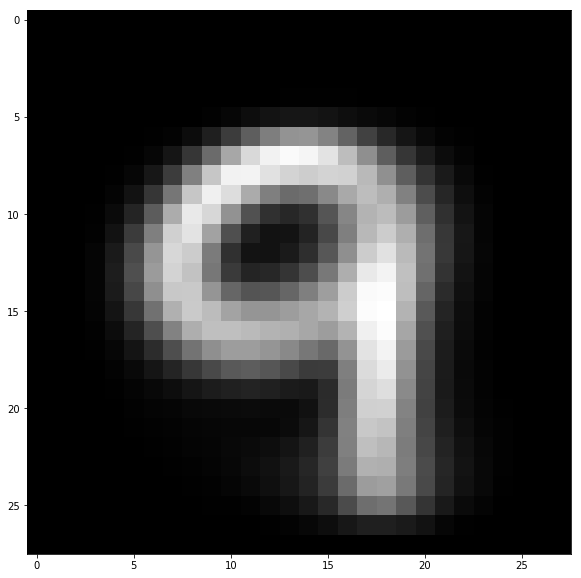

In [53]:
nImgs = classDict[0]
n = nImgs.shape[0]
avgImg = np.dot(nImgs.T, np.ones((n,1)))/n

plt.figure(figsize=(10,10))
plt.imshow(avgImg.reshape(28,28),cmap='gray')
plt.show()

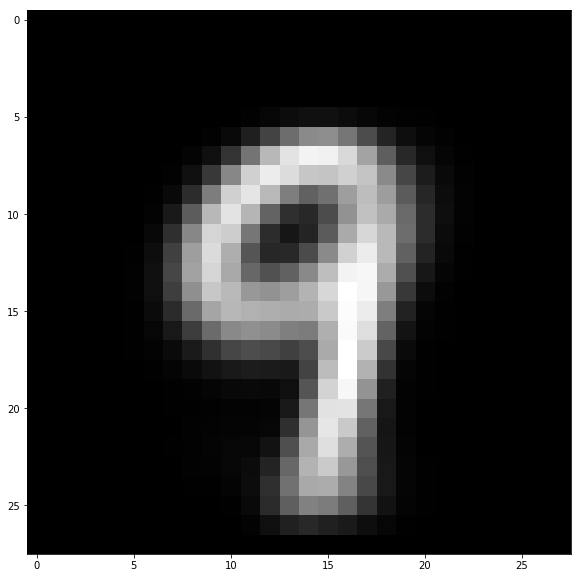

In [54]:
nImgs = classDict[1]
n = nImgs.shape[0]
avgImg = np.dot(nImgs.T, np.ones((n,1)))/n

plt.figure(figsize=(10,10))
plt.imshow(avgImg.reshape(28,28),cmap='gray')
plt.show()

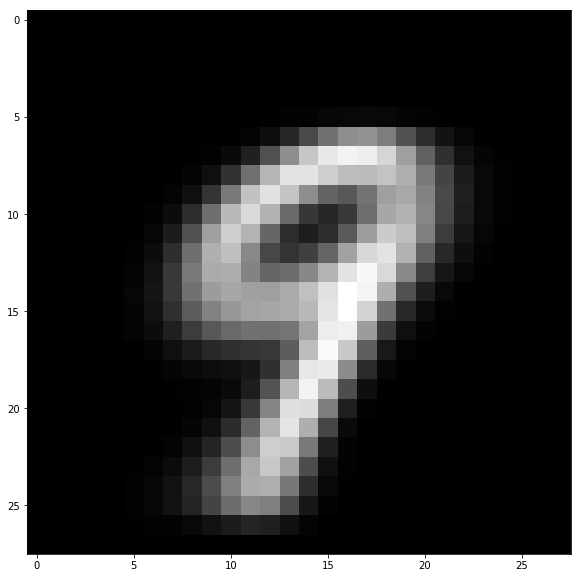

In [55]:
nImgs = classDict[2]
n = nImgs.shape[0]
avgImg = np.dot(nImgs.T, np.ones((n,1)))/n

plt.figure(figsize=(10,10))
plt.imshow(avgImg.reshape(28,28),cmap='gray')
plt.show()